# Лабораторная работа №3  
## Методы численного решения нелинейных уравнений

**Вариант:** IV.12.3 (a, ж), IV.12.4 (a), IV.12.6 (д)  
**Методы:** 
 
0. Метод половинного деления  
1. Метод простой итерации  
2. Метод Ньютона (и модифицированный вариант)  

---


## IV.12.3 (a)  
**Уравнение:**  
$ 2x^2 + 5x - 3 = 0 $  

Найти корни методом половинного деления, простой итерации и Ньютона.


## IV.12.3 (ж)  
**Уравнение:**  
$ 2\tan(x) - \frac{x}{2} + 1 = 0 $

Определить корни и уточнить один из них методом Ньютона.


## IV.12.4 (a)  
**Система:**  
\[
\begin{cases}
\sin(x + 1) - y = 1.2 \\
2x + \cos(y) = 2
\end{cases}
\]

Решить систему с точностью $$ \varepsilon = 10^{-3} $$.


## IV.12.6 (б)  
**Система:**  
\[
\begin{cases}
(x - 1.4)^2 - (y - 0.6)^2 = 1, \\
4.2x^2 + 8.8y^2 = 1.42
\end{cases}
\]

Найти все точки пересечения с точностью $ \varepsilon = 10^{-5}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Функция и производная для IV.12.3(a) ---
f = lambda x: 2*x**2 + 5*x - 3
df = lambda x: 4*x + 5

# --- Метод половинного деления ---
def bisection_log_verbose(f, a, b, eps=1e-6, max_iter=100):
    residuals = []
    for i in range(max_iter):
        c = (a+b)/2
        res = abs(f(c))
        residuals.append(res if res>0 else 1e-16)  # избегаем log(0)
        if res < eps:
            break
        a, b = (a, c) if f(a)*f(c)<0 else (c, b)
    return c, residuals


# --- Метод простой итерации ---
def simple_iteration_log(phi, x0, eps=1e-6, max_iter=1000):
    x = x0
    residuals = []
    for _ in range(max_iter):
        x_next = phi(x)
        res = abs(x_next - x)
        residuals.append(res)
        if res < eps:
            return x_next, residuals
        x = x_next
    raise ValueError("Метод не сошелся")

# --- Метод Ньютона ---
def newton_log_verbose(f, df, x0, eps=1e-6, max_iter=100):
    x = x0
    residuals = []
    for _ in range(max_iter):
        res = abs(f(x))
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            break
        x = x - f(x)/df(x)
    return x, residuals


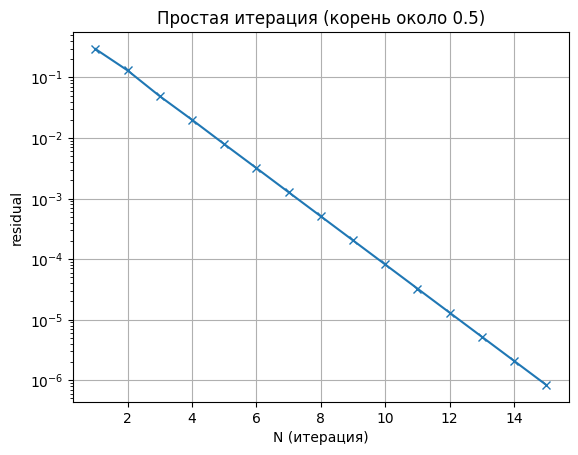

Корень (половинное деление): 0.5
Корень (простая итерация): 0.49999976146125125
Корень (метод Ньютона): 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Функция и производная ---
f = lambda x: 2*x**2 + 5*x - 3
df = lambda x: 4*x + 5

# --- Метод половинного деления ---
def bisection_log(f, a, b, eps=1e-6, max_iter=100):
    if f(a)*f(b) > 0:
        raise ValueError("На концах интервала должны быть значения разного знака")
    residuals = []
    for _ in range(max_iter):
        c = (a + b)/2
        res = abs(f(c))
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return c, residuals
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return (a + b)/2, residuals

# --- Метод простой итерации ---
phi = lambda x: x - 0.2*f(x)
def simple_iteration_log(phi, x0, eps=1e-6, max_iter=1000):
    x = x0
    residuals = []
    for _ in range(max_iter):
        x_next = phi(x)
        res = abs(x_next - x)
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return x_next, residuals
        x = x_next
    raise ValueError("Метод не сошелся")

# --- Метод Ньютона ---
def newton_log(f, df, x0, eps=1e-6, max_iter=100):
    x = x0
    residuals = []
    for _ in range(max_iter):
        x_next = x - f(x)/df(x)
        res = abs(x_next - x)
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return x_next, residuals
        x = x_next
    return x, residuals

# --- Решение ---
root_bis, res_bis = bisection_log(f, 0, 1)
root_si, res_si = simple_iteration_log(phi, 0.7)
root_newton, res_newton = newton_log(f, df, 0.5)

# --- График сделаем только для метода простой итерации ---
plt.figure()
plt.semilogy(np.arange(1, len(res_si)+1), res_si, marker='x')
plt.xlabel("N (итерация)")
plt.ylabel("residual")
plt.title("Простая итерация (корень около 0.5)")
plt.grid(True)
plt.show()


# --- Выведем наши резы для всех 3х методов ---
print("Корень (половинное деление):", root_bis)
print("Корень (простая итерация):", root_si)
print("Корень (метод Ньютона):", root_newton)


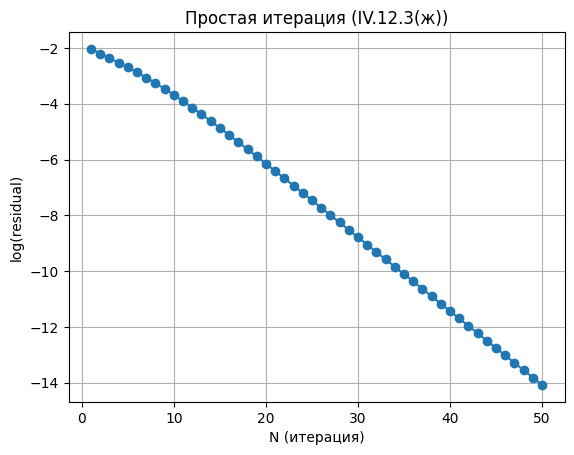

Приближённый корень (метод Ньютона): -0.5713179028318802
Приближённый корень (простая итерация): -0.5713153637752576


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Функция и производная ---
f2 = lambda x: 2*np.tan(x) - x/2 + 1
df2 = lambda x: 2/(np.cos(x)**2) - 0.5

# --- Метод Ньютона ---
def newton_log(f, df, x0, eps=1e-6, max_iter=100):
    x = x0
    residuals = []
    for _ in range(max_iter):
        x_next = x - f(x)/df(x)
        res = abs(x_next - x)
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return x_next, residuals
        x = x_next
    return x, residuals

# --- Метод простой итерации ---
lambda_si = 0.1  # маленький коэффициент для сходимости
phi2 = lambda x: x - lambda_si*f2(x)

def simple_iteration_log(phi, x0, eps=1e-6, max_iter=1000):
    x = x0
    residuals = []
    for _ in range(max_iter):
        x_next = phi(x)
        res = abs(x_next - x)
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return x_next, residuals
        x = x_next
    raise ValueError("Метод не сошелся")

# --- Решение ---
root_newton2, _ = newton_log(f2, df2, 0.2)
root_si2, res_si2 = simple_iteration_log(phi2, 0.2)

# --- График сделаем ток для метода простой итерации ---
plt.figure()
plt.plot(np.arange(1, len(res_si2)+1), np.log(res_si2), marker='o')
plt.xlabel("N (итерация)")
plt.ylabel("log(residual)")
plt.title("Простая итерация (IV.12.3(ж))")
plt.grid(True)
plt.show()

# --- Вывод результатов, тут без половинного деления ---
print("Приближённый корень (метод Ньютона):", root_newton2)
print("Приближённый корень (простая итерация):", root_si2)


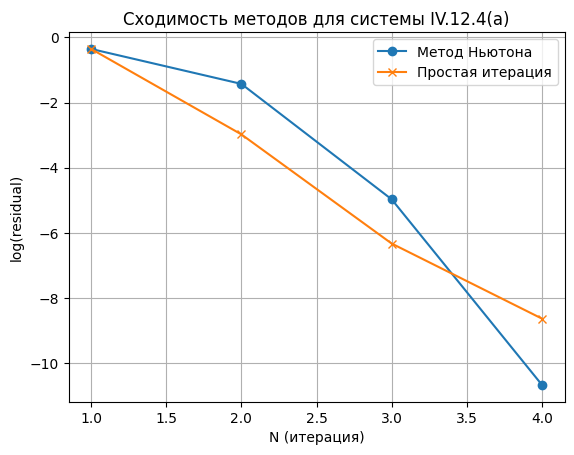

Половинное деление: [ 1.         -0.29070257]
Простая итерация: [ 0.51014975 -0.20184927]
Метод Ньютона: [ 0.51013853 -0.20183886]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# --- Система IV.12.4(a) ---
def F(X):
    x, y = X
    return np.array([
        np.sin(x + 1) - y - 1.2,
        2*x + np.cos(y) - 2
    ])

# --- Якобиан системы ---
def J(X):
    x, y = X
    return np.array([
        [np.cos(x + 1), -1],
        [2, -np.sin(y)]
    ])

# --- Метод Ньютона для системы ---
def newton_system(F, J, X0, eps=1e-3, max_iter=100):
    X = np.array(X0, dtype=float)
    residuals = []
    for _ in range(max_iter):
        FX = F(X)
        residual = norm(FX, ord=np.inf)
        residuals.append(residual if residual>0 else 1e-16)
        if residual < eps:
            return X, residuals
        dX = np.linalg.solve(J(X), FX)
        X = X - dX
    raise ValueError("Метод не сошелся")

# --- Метод простой итерации для системы ---
def simple_iteration_system(X0, eps=1e-3, max_iter=1000):
    X = np.array(X0, dtype=float)
    residuals = []
    for _ in range(max_iter):
        x, y = X
        # Итерационные функции
        x_next = 1 - np.cos(y)/2         # из второго уравнения
        y_next = np.sin(x + 1) - 1.2    # из первого уравнения
        res = max(abs(x_next - x), abs(y_next - y))
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return np.array([x_next, y_next]), residuals
        X = np.array([x_next, y_next])
    raise ValueError("Метод не сошелся")

# --- Половинное деление по координатам ---
def bisection_system(f, a, b, fixed, eps=1e-3, max_iter=100):
    # f(x, y_fixed) для x или f(x_fixed, y) для y
    low, high = a, b
    for _ in range(max_iter):
        mid = (low + high)/2
        val = f(mid, fixed)
        if abs(val) < eps:
            return mid
        if f(a, fixed)*val < 0:
            high = mid
        else:
            low = mid
    return mid

# --- Начальное приближение ---
X0 = [0.5, 0.5]

# --- Решение методами ---
sol_newton, res_newton = newton_system(F, J, X0)
sol_si, res_si = simple_iteration_system(X0)

# Для половинного деления фиксируем y = 0.5 и ищем x
f1 = lambda x, y_fixed: np.sin(x+1) - y_fixed - 1.2
x_bis = bisection_system(f1, 0, 1, 0.5)
y_bis = np.sin(x_bis + 1) - 1.2
sol_bis = np.array([x_bis, y_bis])

# --- Графики сходимости без половинного деления ---
plt.figure()
plt.plot(np.arange(1, len(res_newton)+1), np.log(res_newton), marker='o', label='Метод Ньютона')
plt.plot(np.arange(1, len(res_si)+1), np.log(res_si), marker='x', label='Простая итерация')
plt.xlabel("N (итерация)")
plt.ylabel("log(residual)")
plt.title("Сходимость методов для системы IV.12.4(a)")
plt.grid(True)
plt.legend()
plt.show()

# --- Вывод решений ---
print("Половинное деление:", sol_bis)
print("Простая итерация:", sol_si)
print("Метод Ньютона:", sol_newton)


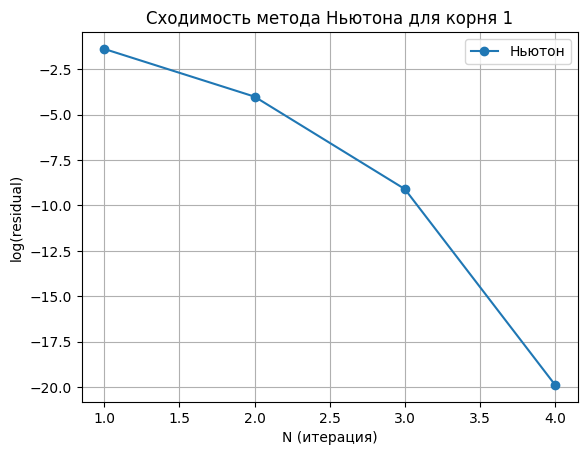

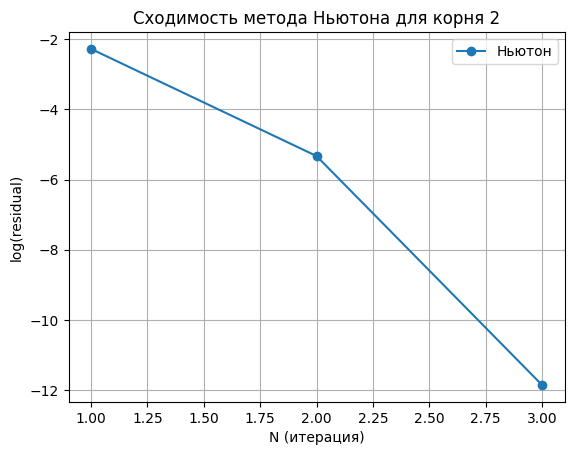

Метод Ньютона:
[0.36026429 0.31530658]
[-0.01531896 -0.4015625 ]

Половинное деление (фиксированное y):
[0.35596924 0.3       ]
[-0.01421051 -0.4       ]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# --- Система IV.12.6(б) ---
def F6b(X):
    x, y = X
    return np.array([
        (x - 1.4)**2 - (y - 0.6)**2 - 1,
        4.2*x**2 + 8.8*y**2 - 1.42
    ])

# --- Якобиан ---
def J6b(X):
    x, y = X
    return np.array([
        [2*(x-1.4), -2*(y-0.6)],
        [8.4*x, 17.6*y]
    ])

# --- Метод Ньютона для системы ---
def newton_system(F, J, X0, eps=1e-5, max_iter=50):
    X = np.array(X0, dtype=float)
    residuals = []
    for _ in range(max_iter):
        FX = F(X)
        res = norm(FX, ord=np.inf)
        residuals.append(res if res>0 else 1e-16)
        if res < eps:
            return X, residuals
        dX = np.linalg.solve(J(X), FX)
        X = X - dX
    raise ValueError("Метод не сошелся")

# --- Половинное деление по x с фиксированным y ---
def bisection_x(f, a, b, y_fixed, eps=1e-5, max_iter=100):
    fa = f(np.array([a, y_fixed]))[0]
    fb = f(np.array([b, y_fixed]))[0]
    if fa*fb > 0:
        return None  # не существует изменения знака на интервале
    for _ in range(max_iter):
        c = (a+b)/2
        fc = f(np.array([c, y_fixed]))[0]
        if abs(fc) < eps:
            return c
        if fa*fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a+b)/2

# --- Начальные приближения ---
start_points = [
    [0.3, 0.3],
    [-0.05, -0.4]
]

roots_newton = []
res_newton = []
roots_bis = []

for X0 in start_points:
    # Метод Ньютона
    sol_n, res_n = newton_system(F6b, J6b, X0)
    roots_newton.append(sol_n)
    res_newton.append(res_n)

    # Половинное деление: фиксируем y = X0[1]
    x_bis = bisection_x(F6b, X0[0]-0.5, X0[0]+0.5, X0[1])
    if x_bis is not None:
        roots_bis.append(np.array([x_bis, X0[1]]))

# --- Графики сходимости для метода Ньютона ---
for i in range(len(roots_newton)):
    plt.figure()
    plt.plot(np.arange(1, len(res_newton[i])+1), np.log(res_newton[i]), marker='o', label='Ньютон')
    plt.xlabel("N (итерация)")
    plt.ylabel("log(residual)")
    plt.title(f"Сходимость метода Ньютона для корня {i+1}")
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Вывод корней, без простой итерации ---
print("Метод Ньютона:")
for r in roots_newton:
    print(r)

print("\nПоловинное деление (фиксированное y):")
for r in roots_bis:
    print(r)
